In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Init functions

In [2]:
def gauss(x):
    return 1/((0.4*np.pi)**0.5)*np.exp(-x**2/0.4)
def saw(x):
    if x < -0.5 or x > 0.5:
        return 0.
    if x >= -0.5 and x < 0:
        return x + 0.5
    if x <= 0.5 and x >= 0:
        return 0.5 - x
    
def gauss_deriv(x):
    return -1/((0.4*np.pi)**0.5)*2*x/0.4*np.exp(-x**2/0.4)
def saw_deriv(x):
    return -np.sign(x) * (x > -0.5 and x < 0.5)
    
def l2(x, h):
    return (sum([x_i**2*h for x_i in x]))**0.5
def linf(x):
    return max(abs(x))

In [3]:
N = 1000
x = np.linspace(-2, 2, N+1)

### Central gradients

In [4]:
def c3(x, f):
    h = x[1:] - x[:-1]
        
    return ((f(x[1]) - f(x[0]))*h[1]**2 + \
            (f(x[2]) - f(x[1]))*h[0]**2)/ \
            (h[0]*h[1]**2 + h[1]*h[0]**2)

def c5(x, f):
    grad = 0.
    
    for i in [0,1,3,4]:
        P = 1.
        
        for k in [0,1,3,4]:
            if k == i: continue
            P *= (x[2] - x[k])/(x[i] - x[k])
            
        grad += P*(f(x[i]) - f(x[2]))/(x[i] - x[2])
    return grad

def c35(x, f):
    return c3(x[1:-1], f)*4/3 - c3(x[::2], f)/3

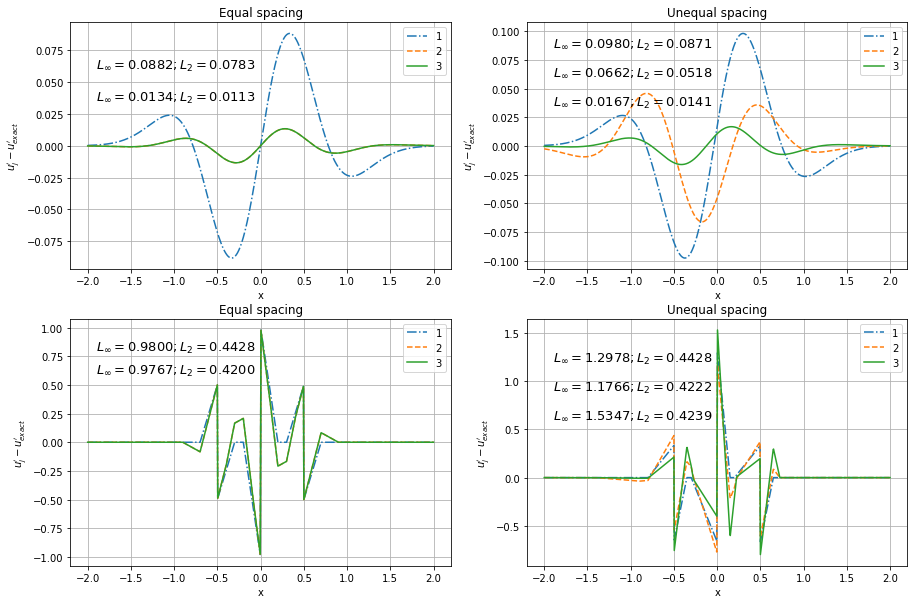

In [5]:
h = [-0.4, -0.2, 0., 0.2, 0.4]
nlh = [-0.225, -0.15, 0., 0.3, 0.9]

exact = gauss_deriv(x)

grad3 = np.zeros_like(x)
grad5 = np.copy(grad3)
grad35 = np.copy(grad3)

grad3nl = np.copy(grad3)
grad5nl = np.copy(grad3)
grad35nl = np.copy(grad3)

for i in range(N+1):
    grad3[i] = c3(h[1:-1] + x[i], gauss)
    grad5[i] = c5(h + x[i], gauss)
    grad35[i] = c35(h + x[i], gauss)
    
for i in range(N+1):
    grad3nl[i] = c3(nlh[1:-1] + x[i], gauss)
    grad5nl[i] = c5(nlh + x[i], gauss)
    grad35nl[i] = c35(nlh + x[i], gauss)

plt.subplots(figsize=(15,10))
plt.subplot(221)
plt.title('Equal spacing')
plt.plot(x, grad3-exact, label='1', linestyle='-.')
plt.plot(x, grad35-exact, label='2', linestyle='--')
plt.plot(x, grad5-exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_j-u^{\prime}_{exact}$')
plt.text(-1.9, 0.06, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad3-exact), l2(grad3-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.035, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad5-exact), l2(grad5-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.subplot(222)
plt.title('Unequal spacing')
plt.plot(x, grad3nl - exact, label='1', linestyle='-.')
plt.plot(x, grad35nl - exact, label='2', linestyle='--')
plt.plot(x, grad5nl - exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_j-u^{\prime}_{exact}$')
plt.text(-1.9, 0.085, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad3nl-exact), l2(grad3nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.06, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad35nl-exact), l2(grad35nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.035, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad5nl-exact), l2(grad5nl-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

exact = [saw_deriv(x) for x in x]

grad3_s = np.zeros_like(x)
grad5_s = np.copy(grad3_s)
grad35_s = np.copy(grad3_s)

grad3nl_s = np.copy(grad3_s)
grad5nl_s = np.copy(grad3_s)
grad35nl_s = np.copy(grad3_s)

for i in range(N+1):
    grad3_s[i] = c3(h[1:-1] + x[i], saw)
    grad5_s[i] = c5(h + x[i], saw)
    grad35_s[i] = c35(h + x[i], saw)
    
for i in range(N+1):
    grad3nl_s[i] = c3(nlh[1:-1] + x[i], saw)
    grad5nl_s[i] = c5(nlh + x[i], saw)
    grad35nl_s[i] = c35(nlh + x[i], saw)

plt.subplot(223)
plt.title('Equal spacing')
plt.plot(x, grad3_s-exact, label='1', linestyle='-.')
plt.plot(x, grad35_s-exact, label='2', linestyle='--')
plt.plot(x, grad5_s-exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_j-u^{\prime}_{exact}$')
plt.text(-1.9, 0.8, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad3_s-exact), l2(grad3_s-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.6, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad5_s-exact), l2(grad5_s-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.subplot(224)
plt.title('Unequal spacing')
plt.plot(x, grad3nl_s-exact, label='1', linestyle='-.')
plt.plot(x, grad35nl_s-exact, label='2', linestyle='--')
plt.plot(x, grad5nl_s-exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_j-u^{\prime}_{exact}$')
plt.text(-1.9, 1.2, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad3nl_s-exact), l2(grad3nl_s-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.9, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad35nl_s-exact), l2(grad35nl_s-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.6, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(grad5nl_s-exact), l2(grad5nl_s-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.show()

### Tangenial gradients

In [6]:
def t2(x, df, f):
    h = (x[1:] - x[:-1])
    return (df(x[0])*h[1] + df(x[2])*h[0])/(h[0] + h[1])

def t4(x, df, f):
    h, grad = x[1:] - x[:-1], 0.
    
    for i in [0,1,3,4]:
        P = 1.
        
        for k in [0,1,3,4]:
            if k == i: continue
            P *= (x[2] - x[k])/(x[i] - x[k])
        grad += P*df(x[i])
        
    return grad

def t24(x, df, f):
    return t2(x[1:-1], df, f)*9/8 - t2(x[::2], df, f)/8

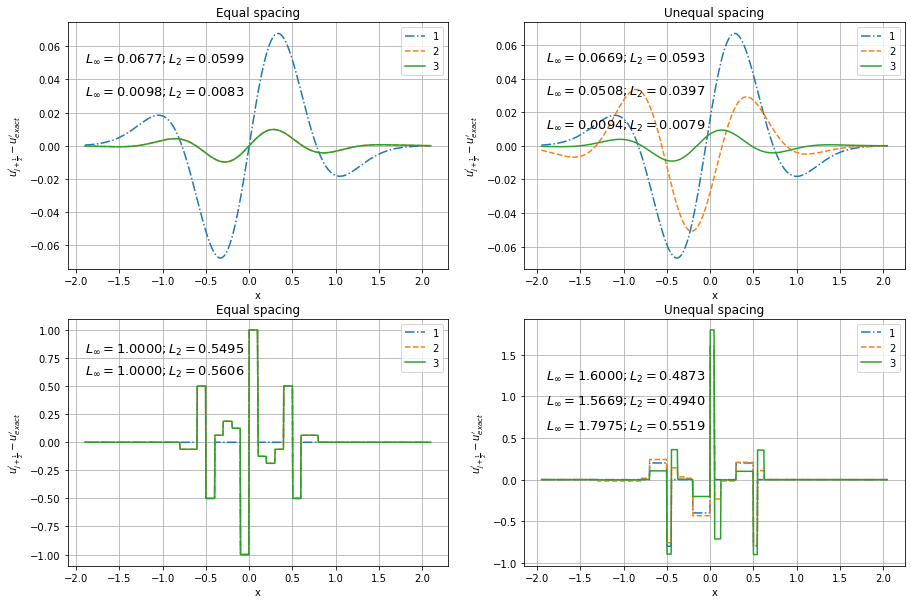

In [7]:
N = 1000
x = np.linspace(-2, 2, N+1)

h = [-0.2, 0.0, 0.1, 0.2, 0.4]
h1 = 0.1

nlh = [-0.075, 0., 0.05, 0.25, 0.85]
h2 = 0.05

tan2 = np.zeros_like(x)
tan4 = np.copy(tan2)
tan24 = np.copy(tan2)

tan2nl = np.copy(tan2)
tan4nl = np.copy(tan2)
tan24nl = np.copy(tan2)

for i in range(N+1):
    tan2[i] = t2(h[1:-1] + x[i], gauss_deriv, gauss)
    tan4[i] = t4(h + x[i], gauss_deriv, gauss)
    tan24[i] = t24(h + x[i], gauss_deriv, gauss)
    
for i in range(N+1):
    tan2nl[i] = t2(nlh[1:-1] + x[i], gauss_deriv, gauss)
    tan4nl[i] = t4(nlh + x[i], gauss_deriv, gauss)
    tan24nl[i] = t24(nlh + x[i], gauss_deriv, gauss)
    
plt.subplots(figsize=(15,10))
plt.subplot(221)
plt.title('Equal spacing')
exact = gauss_deriv(x + h1)
plt.plot(x + h1, tan2-exact, label='1', linestyle='-.')
plt.plot(x + h1, tan24-exact, label='2', linestyle='--')
plt.plot(x + h1, tan4-exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, 0.05, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan2-exact), l2(tan2-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.03, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan4-exact), l2(tan4-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.subplot(222)
plt.title('Unequal spacing')
exact = gauss_deriv(x + h2)
plt.plot(x + h2, tan2nl - exact, label='1', linestyle='-.')
plt.plot(x + h2, tan24nl - exact, label='2', linestyle='--')
plt.plot(x + h2, tan4nl - exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, 0.05, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan2nl-exact), l2(tan2nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.03, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan24nl-exact), l2(tan24nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.01, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan4nl-exact), l2(tan4nl-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

for i in range(2, N-2):
    tan2[i] = t2(h[1:-1] + x[i], saw_deriv, saw)
    tan4[i] = t4(h + x[i], saw_deriv, saw)
    tan24[i] = t24(h + x[i], saw_deriv, saw)
    
for i in range(2, N-2):
    tan2nl[i] = t2(nlh[1:-1] + x[i], saw_deriv, saw)
    tan4nl[i] = t4(nlh + x[i], saw_deriv, saw)
    tan24nl[i] = t24(nlh + x[i], saw_deriv, saw)

plt.subplot(223)
plt.title('Equal spacing')
exact = [saw_deriv(x + h1) for x in x]
plt.plot(x + h1, tan2-exact, label='1', linestyle='-.')
plt.plot(x + h1, tan24-exact, label='2', linestyle='--')
plt.plot(x + h1, tan4-exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, 0.8, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan2-exact), l2(tan2-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.6, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan4-exact), l2(tan4-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.subplot(224)
plt.title('Unequal spacing')
exact = [saw_deriv(x + h2) for x in x]
plt.plot(x + h2, tan2nl-exact, label='1', linestyle='-.')
plt.plot(x + h2, tan24nl-exact, label='2', linestyle='--')
plt.plot(x + h2, tan4nl-exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, 1.2, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan2nl-exact), l2(tan2nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.9, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan24nl-exact), l2(tan24nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.6, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(tan4nl-exact), l2(tan4nl-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.show()

## Normal gradients

In [11]:
def n2(x, df, f):
    h = x[1:] - x[:-1]
        
    return (f(x[2]) - f(x[0]))/(h[0] + h[1]) - \
            (h[1] - h[0])*(df(x[2]) - df(x[0]))/(h[0] + h[1])/2
            
def n4(x, df, f):
    h, grad = x[1:] - x[:-1], 0.
    
    for i in [0,1,3,4]:
        S = 0.
        for k in [0,1,3,4]:
            if k == i: continue
            P = 1.  
            for q in [0,1,3,4]:
                if q == i or q == k: continue
                P *= (x[2] - x[q])
            S += P
        for k in [0,1,3,4]:
            if k == i: continue
            S /= (x[i] - x[k])
        grad += S*f(x[i])
    
    return grad
            
def n24(x, df, f):
    return n2(x[1:-1], df, f)*9/8 - n2(x[::2], df, f)/8

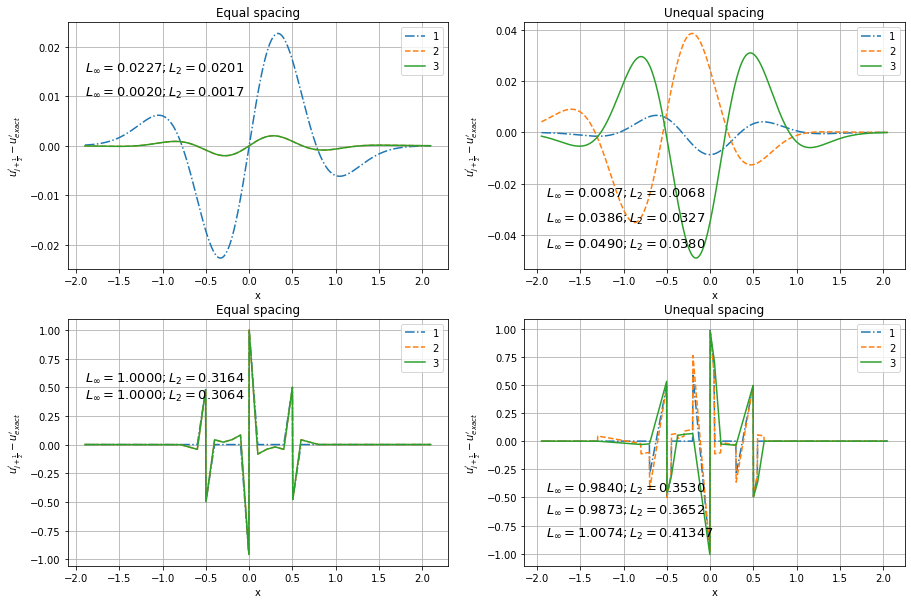

In [12]:
N = 1000
x = np.linspace(-2, 2, N+1)
h1 = 0.1
h2 = 0.05

h = [-0.2, 0., 0.1, 0.2, 0.4]
nlh = [-0.075, 0., 0.05, 0.25, 0.85]

norm2 = np.zeros_like(x)
norm4 = np.copy(norm2)
norm24 = np.copy(norm2)

norm2nl = np.copy(norm2)
norm4nl = np.copy(norm2)
norm24nl = np.copy(norm2)

for i in range(N+1):
    norm2[i] = n2(h[1:-1] + x[i], gauss_deriv, gauss)
    norm4[i] = n4(h + x[i], gauss_deriv, gauss)
    norm24[i] = n24(h + x[i], gauss_deriv, gauss)
    
for i in range(N+1):
    norm2nl[i] = n2(nlh[1:-1] + x[i], gauss_deriv, gauss)
    norm4nl[i] = n4(nlh + x[i], gauss_deriv, gauss)
    norm24nl[i] = n24(nlh + x[i], gauss_deriv, gauss)

plt.subplots(figsize=(15,10))
plt.subplot(221)
plt.title('Equal spacing')
exact = gauss_deriv(x + h1)
plt.plot(x + h1, norm2 - exact, label='1', linestyle='-.')
plt.plot(x + h1, norm24 - exact, label='2', linestyle='--')
plt.plot(x + h1, norm4 - exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, 0.015, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm2-exact), l2(norm2-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.01, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm4-exact), l2(norm4-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.subplot(222)
plt.title('Unequal spacing')
exact = gauss_deriv(x + h2)
plt.plot(x + h2, norm2nl - exact, label='1', linestyle='-.')
plt.plot(x + h2, norm24nl - exact, label='2', linestyle='--')
plt.plot(x + h2, norm4nl - exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, -0.025, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm2nl-exact), l2(norm2nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, -0.035, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm24nl-exact), l2(norm24nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, -0.045, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm4nl-exact), l2(norm4nl-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

for i in range(N+1):
    norm2[i] = n2(h[1:-1] + x[i], saw_deriv, saw)
    norm4[i] = n4(h + x[i], saw_deriv, saw)
    norm24[i] = n24(h + x[i], saw_deriv, saw)
    
for i in range(N+1):
    norm2nl[i] = n2(nlh[1:-1] + x[i], saw_deriv, saw)
    norm4nl[i] = n4(nlh + x[i], saw_deriv, saw)
    norm24nl[i] = n24(nlh + x[i], saw_deriv, saw)

plt.subplot(223)
plt.title('Equal spacing')
exact = [saw_deriv(x + h1) for x in x]
plt.plot(x + h1, norm2 - exact, label='1', linestyle='-.')
plt.plot(x + h1, norm24 - exact, label='2', linestyle='--')
plt.plot(x + h1, norm4 - exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, 0.55, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm2-exact), l2(norm2-exact, 4/N)), fontsize=13)
plt.text(-1.9, 0.4, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm4-exact), l2(norm4-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.subplot(224)
plt.title('Unequal spacing')
exact = [saw_deriv(x + h2) for x in x]
plt.plot(x + h2, norm2nl - exact, label='1', linestyle='-.')
plt.plot(x + h2, norm24nl - exact, label='2', linestyle='--')
plt.plot(x + h2, norm4nl - exact, label='3')
plt.xlabel('x')
plt.ylabel(r'$u^{\prime}_{j+\frac{1}{2}}-u^{\prime}_{exact}$')
plt.text(-1.9, -0.45, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm2nl-exact), l2(norm2nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, -0.65, r"$L_{\infty} = %.4f; L_2 = %.4f$" % (linf(norm24nl-exact), l2(norm24nl-exact, 4/N)), fontsize=13)
plt.text(-1.9, -0.85, r"$L_{\infty} = %.4f; L_2 = %.5f$" % (linf(norm4nl-exact), l2(norm4nl-exact, 4/N)), fontsize=13)
plt.grid()
plt.legend()

plt.show()